In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet

In [6]:
df1 = pd.read_csv('USD_TRY.csv',decimal=',')

 Dolar endeksi, ABD dolarının diğer önemli para birimleri karşısındaki gücünü ölçer. Dolayısıyla, dolar endeksinin günlük değeri, ABD dolarının diğer para birimleri karşısındaki gücündeki değişikliklere bağlı olarak dalgalanır

Örneğin, dolar endeksi yükselirse, bu ABD dolarının diğer para birimleri karşısındaki gücünün arttığı anlamına gelir, ancak bu sadece ABD dolarının tek başına gücünün arttığı anlamına gelmez. Dolar endeksinin yükselmesi, diğer para birimlerinin de dolar karşısında zayıfladığını gösterir.

In [7]:
df1.shape

(3433, 7)

In [8]:
df1.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,07.04.2023,101.795,101.645,101.980,101.565,-,"0,27%"
1,06.04.2023,101.519,101.575,101.830,101.435,"9,87K","-0,03%"
2,05.04.2023,101.545,101.245,101.680,101.090,"16,08K","0,27%"
3,04.04.2023,101.267,101.735,101.950,101.140,"15,26K","-0,51%"
4,03.04.2023,101.787,102.270,102.745,101.560,"16,16K","-0,39%"


In [9]:
# Kullanılacak kolonları seç
df = df1[['Tarih','Şimdi']]

In [11]:
df.head()

,Tarih,Şimdi
0,07.04.2023,101.795
1,06.04.2023,101.519
2,05.04.2023,101.545
3,04.04.2023,101.267
4,03.04.2023,101.787


In [12]:
# Prophet  için ds (Tarih) and y (Değer) kolonları gerekiyor
df = df.rename(columns={'Tarih': 'ds', 'Şimdi': 'y'})

In [13]:
# Tarih formatını düzenle
df['ds'] = pd.to_datetime(df['ds'], format='%d.%m.%Y')

In [25]:
# Satırlarımız sadece 2011'den sonrasını içersin
df = df[(df['ds']>='2010-01-01')&(df['ds']<='2023-04-06')]
 
df = df.sort_values(by=['ds'],ascending=True)

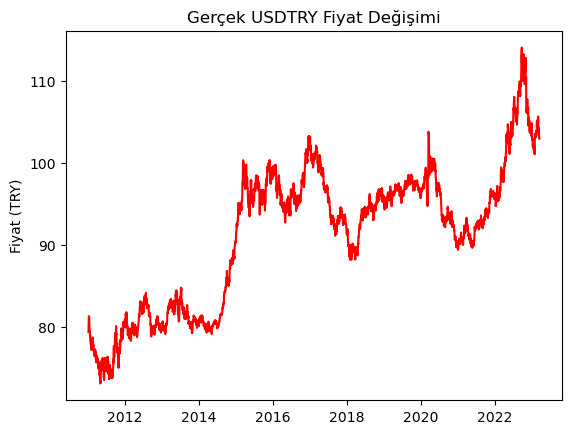

In [26]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(df['ds'], df['y'],'r') # kırmızı renk
plt.title('Gerçek USDTRY Fiyat Değişimi')
plt.ylabel('Fiyat (TRY)')
plt.draw()

In [20]:
# prophet modelini hazırla ve fit metodunu uygula
# https://facebook.github.io/prophet/docs/quick_start.html#python-api
df_prophet = prophet.Prophet(changepoint_prior_scale=0.15)
df_prophet.fit(df)

16:47:01 - cmdstanpy - INFO - Chain [1] start processing
16:47:02 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# 12 aylık gelecek tahmini yap
tahmin_suresi=365
df_forecast = df_prophet.make_future_dataframe(periods= tahmin_suresi, freq='D')

In [22]:
# Tahminleri gerçekleştir
df_forecast = df_prophet.predict(df_forecast)

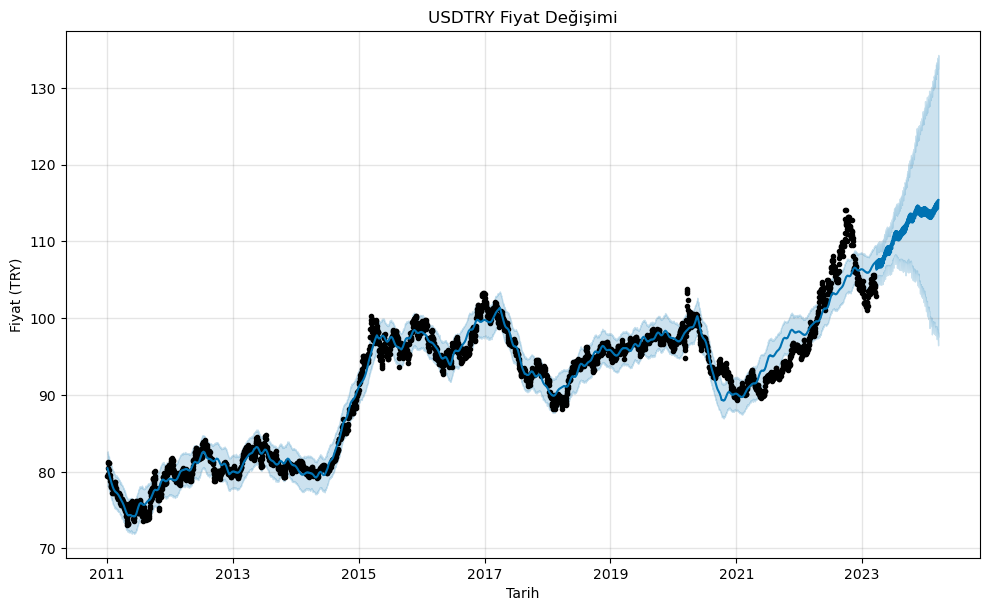

In [23]:
# Sonuçları görselleştir
df_prophet.plot(df_forecast, xlabel = 'Tarih', ylabel = '1 $ karşılığı TRY değeri')
plt.title(f'{tahmin_suresi} günlük USDTRY Tahmin')
plt.title('USDTRY Fiyat Değişimi')
plt.ylabel('Fiyat (TRY)')
 
plt.show()

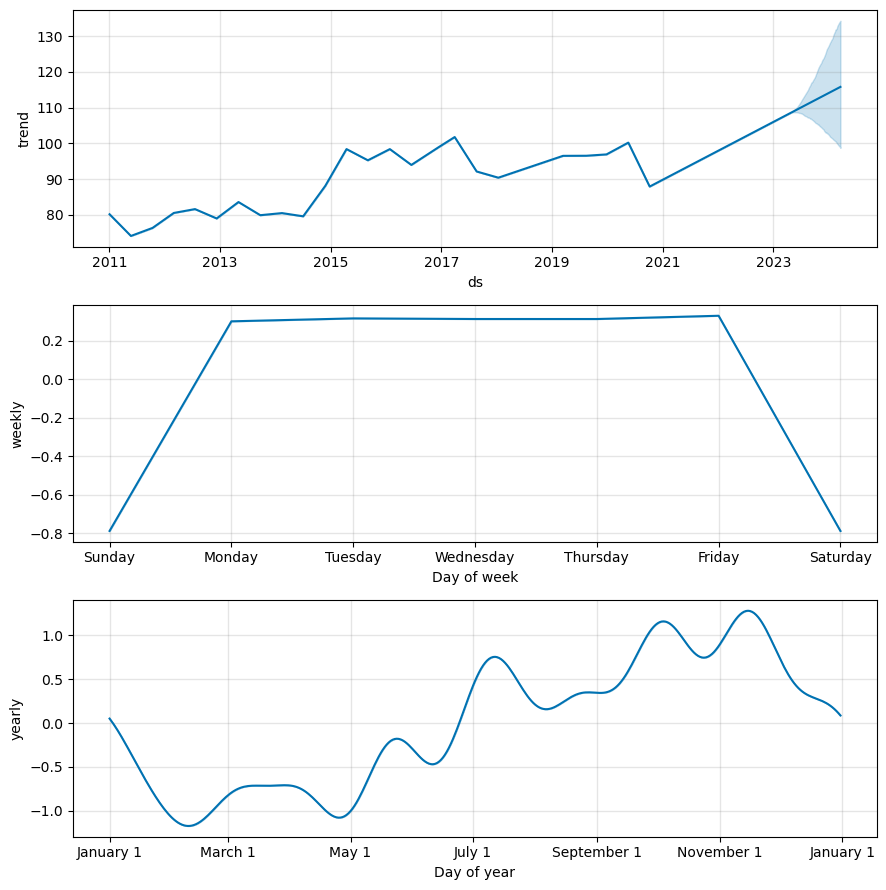

In [24]:
# tahmin bileşenlerini grafiğe aktar
df_prophet.plot_components(df_forecast)
plt.show()

In [ ]:
# import plotly.tools as tls
# import plotly.plotly as py
# mpl_fig=plt.figure()
# plotly_fig = tls.mpl_to_plotly(mpl_fig)
# unique_url = py.plot(plotly_fig)